In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdsciiitdwd-aimprove-contest-1/AImprove-Contest-1.csv


In [2]:
df = pd.read_csv('/kaggle/input/gdsciiitdwd-aimprove-contest-1/AImprove-Contest-1.csv')

In [3]:
df.shape

(565, 7)

In [4]:
df = df[(df['price'] >= 1750000) & (df['price'] <= 13300000)]

In [5]:
df.shape

(545, 7)

In [6]:
df = df.dropna()

In [7]:
df.shape

(545, 7)

In [8]:
col_main_road = df['mainroad'].describe()
print(col_main_road)

count       545.000000
mean       1904.801835
std       40716.710319
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      946912.000000
Name: mainroad, dtype: float64


In [9]:
df['mainroad'] = df['mainroad'].apply(lambda mr: 0 if mr != 0 and mr != 1 else mr)

In [10]:
col_main_road = df['mainroad'].describe()
print(col_main_road)

count    545.000000
mean       0.855046
std        0.352378
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mainroad, dtype: float64


In [11]:
numerical_columns = df.select_dtypes(include=['number']).columns.difference(['mainroad'])

rows_with_negative_values = df[(df[numerical_columns] < 0).any(axis=1)]

df = df.drop(rows_with_negative_values.index)

df = df.reset_index(drop=True)

In [12]:
df.shape

(539, 7)

In [13]:
df.describe()

,index,price,area,bedrooms,bathrooms,stories,mainroad
count,539.000000,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000
mean,278.252319,4.784986e+06,5167.738404,2.972171,1.289425,1.810761,0.855288
std,160.991697,1.872216e+06,2174.785366,0.737451,0.504349,0.869450,0.352137
min,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,139.500000,3.465000e+06,3600.000000,3.000000,1.000000,1.000000,1.000000
50%,277.000000,4.375000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000
75%,416.500000,5.789000e+06,6380.000000,3.000000,2.000000,2.000000,1.000000
max,559.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000


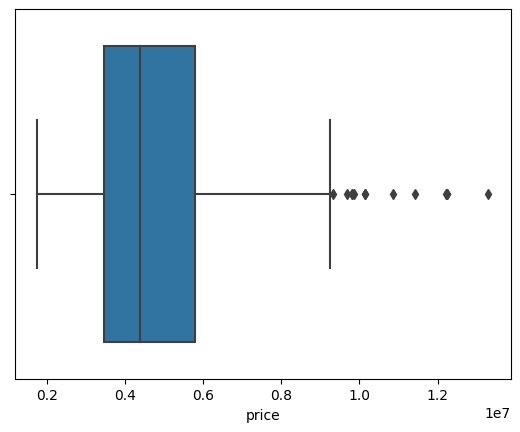

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.boxplot(x = df['price'])

plt.show()

In [15]:
gr = px.histogram(df, x = 'price')

gr


In [16]:
gr2 = px.histogram(df, x = 'bedrooms')

gr2

In [17]:
gr3 = px.histogram(df, x = 'area')

gr3


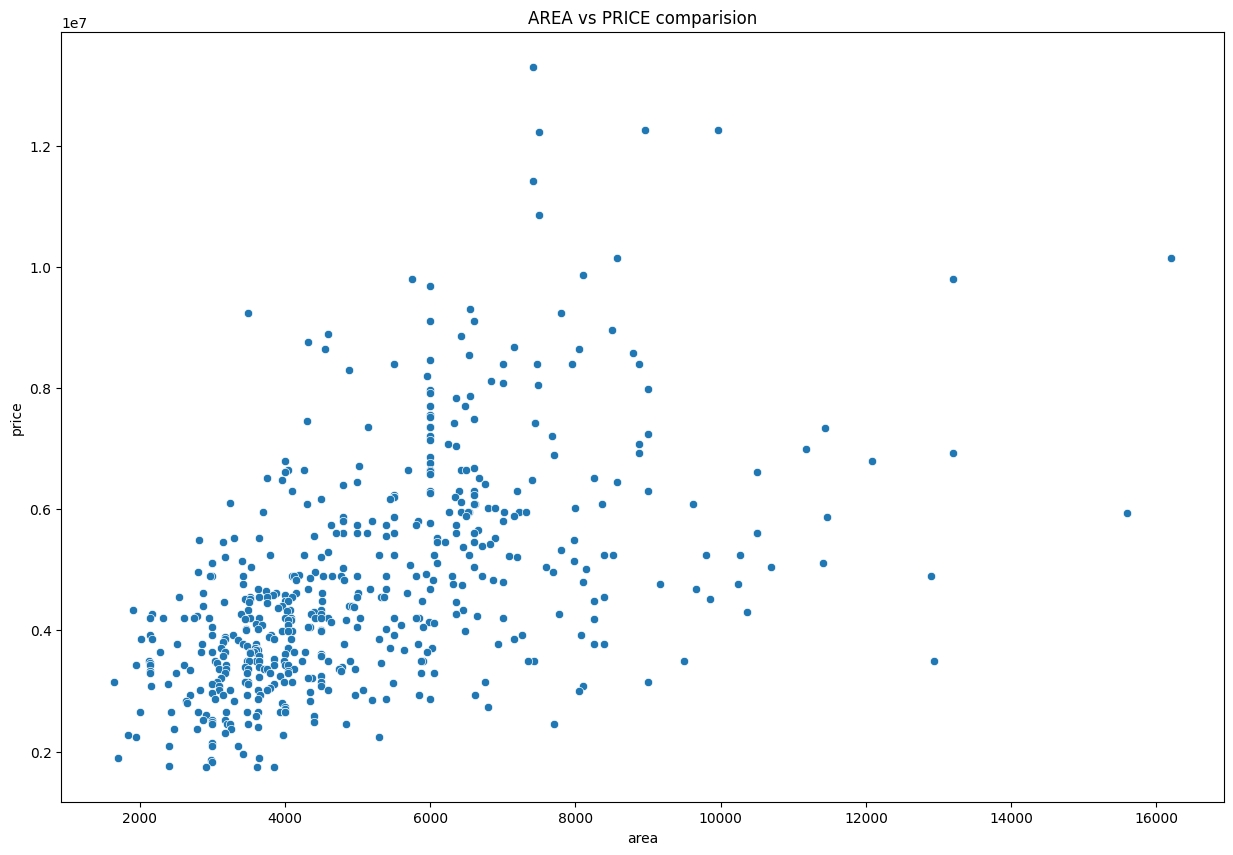

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='area', y='price', data=df)
plt.title('AREA vs PRICE comparision')
plt.show()

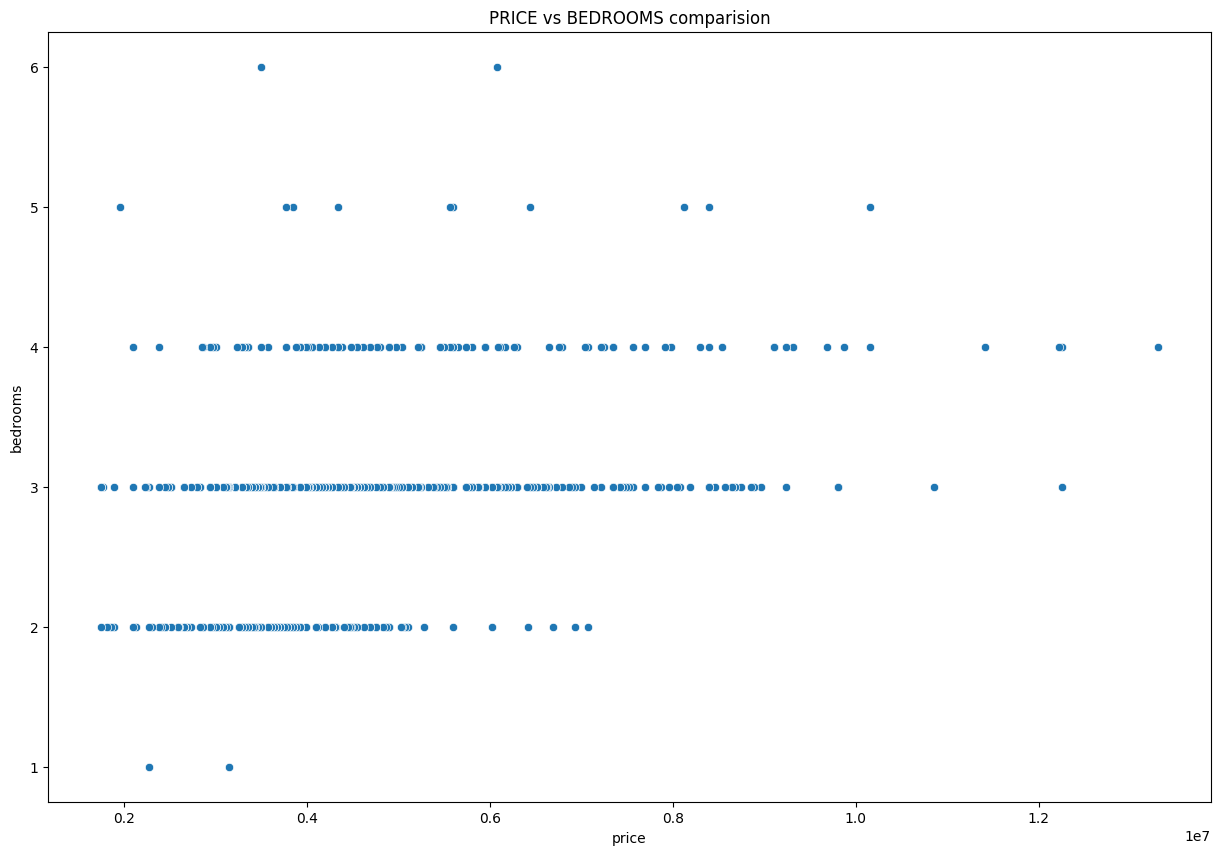

In [19]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='price', y='bedrooms', data=df)
plt.title('PRICE vs BEDROOMS comparision')
plt.show()


In [20]:
df.isnull().sum()

index        0
price        0
area         0
bedrooms     0
bathrooms    0
stories      0
mainroad     0
dtype: int64

In [21]:
df.dropna()

,index,price,area,bedrooms,bathrooms,stories,mainroad
0,0,13300000.0,7420.0,4.0,2.0,3.0,1.0
1,1,12250000.0,8960.0,4.0,4.0,4.0,1.0
2,2,12250000.0,9960.0,3.0,2.0,2.0,1.0
3,3,12215000.0,7500.0,4.0,2.0,2.0,1.0
4,5,11410000.0,7420.0,4.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...
534,555,1820000.0,3000.0,2.0,1.0,1.0,1.0
535,556,1767150.0,2400.0,3.0,1.0,1.0,0.0
536,557,1750000.0,3620.0,2.0,1.0,1.0,1.0
537,558,1750000.0,2910.0,3.0,1.0,1.0,0.0


In [22]:
df.isnull()

,index,price,area,bedrooms,bathrooms,stories,mainroad
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
534,False,False,False,False,False,False,False
535,False,False,False,False,False,False,False
536,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False


/tmp/ipykernel_19/1372308422.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




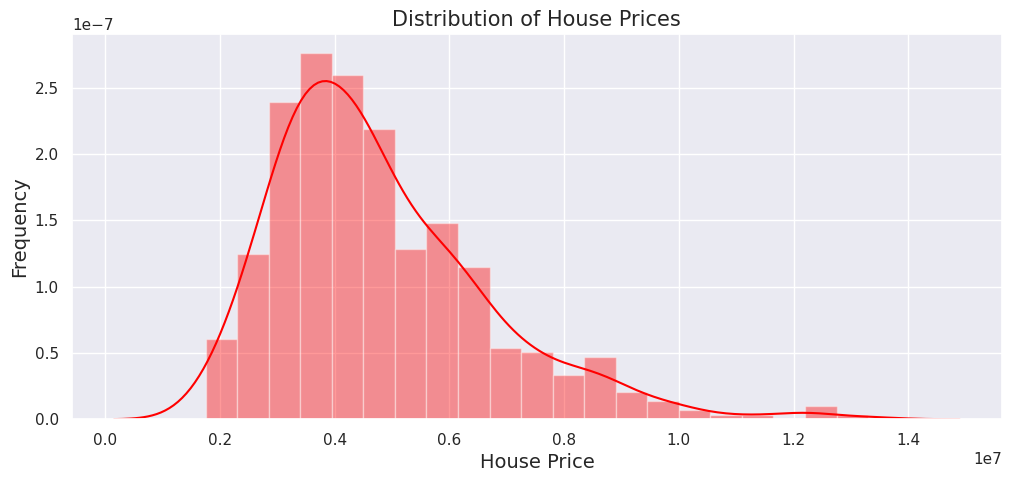

In [23]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.distplot(df['price'], color='red')
plt.xlabel('House Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of House Prices', fontsize=15)
plt.show()

In [24]:
data = df.sort_values(by = 'price', ascending = False)

In [25]:
ok = data['price'].is_monotonic_decreasing
if ok:
    print('yes')
else:
    print('no')


yes


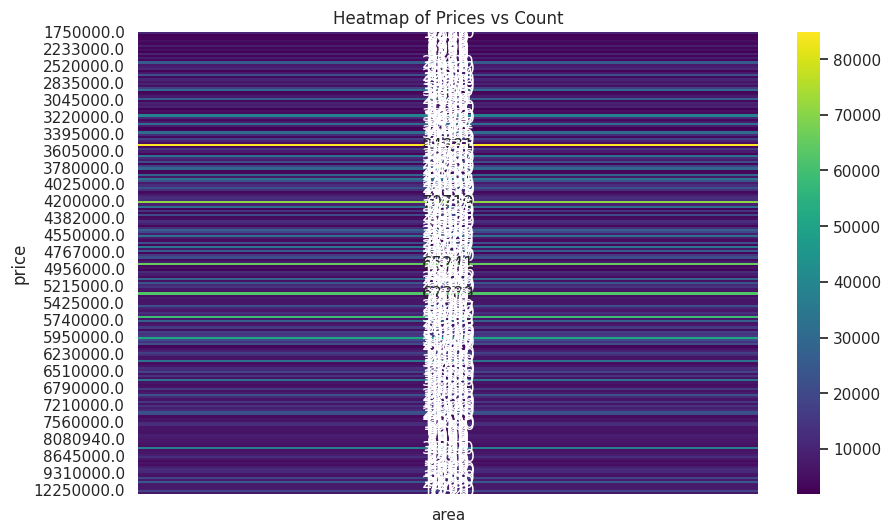

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.pivot_table(index='price', values='area', aggfunc='sum').fillna(0), cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Prices vs Count')
plt.show()

In [27]:
data.to_csv('/kaggle/working/submission.csv', index=False)